In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
tf.__version__

'2.17.1'

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
X_train.shape

(60000, 28, 28)

4


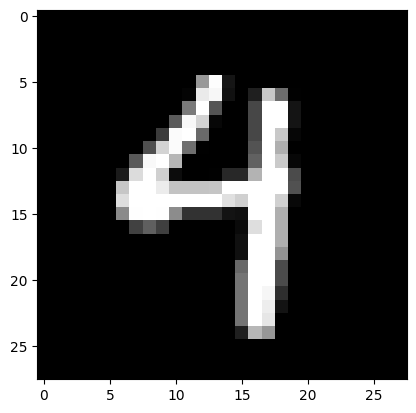

In [4]:
i=np.random.randint(0,60000)
print(y_train[i])
plt.imshow(X_train[i],cmap='gray')


In [5]:
X_train=X_train.reshape(X_train.shape[0],28,28,1).astype('float32')


In [6]:
X_train.shape

(60000, 28, 28, 1)

In [7]:
X_train[0].min(),X_train[0].max()

(0.0, 255.0)

In [8]:
X_train=(X_train-127.5)/127.5

In [9]:
X_train[0].min(),X_train[0].max()

(-1.0, 1.0)

In [10]:
buffer_size=60000
batch_size=256

In [11]:
X_train=tf.data.Dataset.from_tensor_slices(X_train).shuffle(buffer_size).batch(batch_size)

#Generator

In [12]:
def build_generator():
  network=tf.keras.Sequential()
  network.add(layers.Dense(7*7*256,use_bias=False,input_shape=(100,)))
  network.add(layers.BatchNormalization())
  network.add(layers.LeakyReLU())
  network.add(layers.Reshape((7,7,256)))
  #7*7*128
  network.add(layers.Conv2DTranspose(filters=128,kernel_size=(5,5),strides=(1,1),padding='same',use_bias=False))
  network.add(layers.BatchNormalization())
  network.add(layers.LeakyReLU())
  #14*14*64
  network.add(layers.Conv2DTranspose(filters=64,kernel_size=(5,5),strides=(2,2),padding='same',use_bias=False))
  network.add(layers.BatchNormalization())
  network.add(layers.LeakyReLU())
  #28*28*1
  network.add(layers.Conv2DTranspose(filters=1,kernel_size=(5,5),strides=(2,2),padding='same',use_bias=False,activation='tanh'))
  network.summary()
  return network



In [13]:
generator=build_generator()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 12544)               │       1,254,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 12544)               │          50,176 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu (LeakyReLU)              │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape (Reshape)                    │ (None, 7, 7, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose (Conv2DTranspose)   │ (None, 7, 7, 128)           │         819,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 7, 7, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_1 (LeakyReLU)            │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_1 (Conv2DTranspose) │ (None, 14, 14, 64)          │         204,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 14, 14, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_2 (LeakyReLU)            │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_2 (Conv2DTranspose) │ (None, 28, 28, 1)           │           1,600 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,330,944 (8.89 MB)

 Trainable params: 2,305,472 (8.79 MB)

 Non-trainable params: 25,472 (99.50 KB)

In [14]:
noise=tf.random.normal([1,100])
noise

<tf.Tensor: shape=(1, 100), dtype=float32, numpy=
array([[ 0.17446575,  2.5809655 ,  0.06360174,  0.5931656 ,  1.4957852 ,
        -1.2830389 , -0.1213524 ,  1.7673556 , -1.469935  ,  0.59677196,
         0.07292496,  0.065479  , -2.7788334 , -1.5870553 , -1.5953686 ,
         0.4060472 , -1.2714107 ,  1.2671324 , -0.77358854, -0.7687237 ,
         2.2990148 ,  0.28987488,  1.5068566 ,  0.16687982,  1.937619  ,
        -1.2116932 , -2.3266387 , -0.47480968, -0.31508064, -0.8559036 ,
         1.8140069 ,  0.7144429 , -3.0379066 , -0.6283711 , -0.3823838 ,
         1.2611688 , -0.10147396, -0.3029722 ,  1.233631  , -1.7504377 ,
         2.3039813 , -0.3571931 ,  0.38954556,  1.1500219 ,  0.6424485 ,
        -0.07700198,  1.5663201 , -0.43506098, -0.3069354 ,  1.1272726 ,
        -2.3374372 , -0.15455562, -0.06432275, -1.4757981 , -1.7224321 ,
         1.1738065 , -0.5289421 , -0.32781234,  0.561719  ,  0.4785058 ,
        -0.8921859 , -0.6001827 , -0.09546503, -0.9413989 , -0.6362295 ,
 

In [15]:
generated_image=generator(noise,training=False)

In [16]:
generated_image.shape

TensorShape([1, 28, 28, 1])

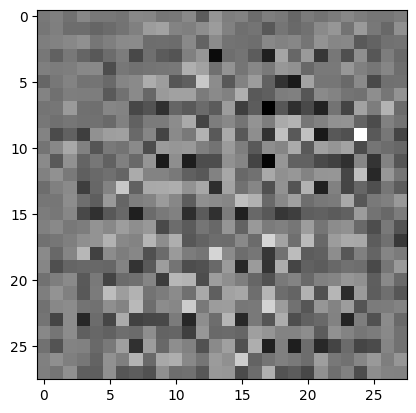

In [17]:
plt.imshow(generated_image[0,:,:,0],cmap='gray')

#Discriminator

In [18]:
def build_discriminator():
    network = tf.keras.Sequential()

    # Input layer: Define input shape here
    network.add(layers.Conv2D(filters=64, strides=(2, 2), kernel_size=(5, 5), padding='same', input_shape=(28, 28, 1)))
    network.add(layers.LeakyReLU())
    network.add(layers.Dropout(0.3))

    # Second Conv2D layer: Do not specify input_shape again
    network.add(layers.Conv2D(filters=128, strides=(2, 2), kernel_size=(5, 5), padding='same'))
    network.add(layers.LeakyReLU())
    network.add(layers.Dropout(0.3))

    # Final layers
    network.add(layers.Flatten())
    network.add(layers.Dense(1))

    network.summary()
    return network



In [19]:
discriminator=build_discriminator()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 14, 14, 64)          │           1,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_3 (LeakyReLU)            │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 7, 7, 128)           │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_4 (LeakyReLU)            │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │           6,273 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 212,865 (831.50 KB)

 Trainable params: 212,865 (831.50 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
discriminator(generated_image, training = False) # logits


<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[-0.00185351]], dtype=float32)>

In [21]:
tf.sigmoid(-0.00185351)

<tf.Tensor: shape=(), dtype=float32, numpy=0.49953657>

#Loss

In [22]:
# This method returns a helper function to compute cross entropy loss
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

In [28]:
def discriminator_loss(expected_output,fake_output):
  real_loss=cross_entropy(tf.ones_like(expected_output),expected_output)
  fake_loss=cross_entropy(tf.zeros_like(fake_output),fake_output)
  total_loss=real_loss+fake_loss
  return total_loss

In [24]:
def generator_loss(fake_output):
  return cross_entropy(tf.ones_like(fake_output),fake_output)

In [25]:
generator_optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)

#Training with Gan

In [26]:
epochs=100
noise_dim=100
num_images_to_generate=16
seed=tf.random.normal([num_images_to_generate,noise_dim])

In [27]:
batch_size,noise_dim

(256, 100)

In [29]:
# Notice the use of `tf.function`
# This annotation causes the function to be "compiled".
@tf.function
def train(images):
    noise = tf.random.normal([batch_size, noise_dim])
    #print(noise.shape)
    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
      generated_images = generator(noise, training=True)

      real_output = discriminator(images, training=True)
      fake_output = discriminator(generated_images, training=True)

      gen_loss = generator_loss(fake_output)
      disc_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

In [30]:
tf.config.run_functions_eagerly(True)
X_train_batch = X_train.as_numpy_iterator().next()
train(X_train_batch)

#Visulaizing the result

In [31]:
test_images=tf.random.normal([num_images_to_generate,noise_dim])
test_images.shape

TensorShape([16, 100])

In [40]:
def train_gan(dataset,epochs,test_images):
  for epoch in range(epochs):
    for image_batch in dataset:
      #print(image_batch.shape)
      train(image_batch)
    print('Epoch: ', epoch +1)
    generated_images=generator(test_images,training=False)
    fig=plt.figure(figsize=(10,10))
    for i in range(generated_images.shape[0]):
      plt.subplot(4,4,i+1)
      plt.imshow(generated_images[i,:,:,0]*127.5+127.5,cmap='gray')
      plt.axis('off')
    plt.show()

In [41]:
train_gan(X_train,epochs,test_images)


Output hidden; open in https://colab.research.google.com to view.